# Desenhando gráficos com a Matplotlib

## $ \S 1 $ Introdução

__Gráficos__ comunicam informação visualmente através de uma combinação de
pontos, curvas, cores, símbolos e palavras. Através deles é possível transmitir
uma quantidade de informação ordens de magnitude maior que por meio de tabelas
ou textos, desde que eles sejam usados de maneira apropriada. Em particular,
gráficos podem facilitar a compreensão rápida de padrões e anomalias, a
identificação de correlações e a interpretação do real significado por
trás de um conjunto de dados.

Neste caderno veremos como utilizar uma das bibliotecas mais importantes
e tradicionais do Python, a **Matplotlib**, para desenhar alguns tipos simples
de gráficos.  Apesar da nossa discussão se restringir a alguns poucos recursos,
ela é capaz de gerar gráficos de praticamente qualquer tipo imaginável.
Recomendamos navegar pela seguinte
[galeria de exemplos](https://matplotlib.org/stable/gallery/index.html) para
obter uma noção melhor do seu poder. Clicando em um destes exemplos você
pode ler (e copiar) o fragmento de código utilizado para gerá-lo.

## $ \S 2 $ Exemplos de gráficos de funções de uma variável

Para desenhar gráficos de uma função de uma variável, bibliotecas como a
Matplotlib utilizam o __método de amostragem__. Este método consiste em tomar
uma amostra de pontos $ (x, y) $ no gráfico da função ao longo do intervalo
de $ x $ desejado e em conectar por um segmento de reta
pontos vizinhos, quando estes estão ordenados pelas suas coordenadas-$ x $.

Geralmente a amostra dos pontos é obtida da seguinte maneira:
1. Geramos um número $ N $ de pontos $ x $ igualmente
   espaçados dentro do intervalo de interesse no domínio da função, e os
   armazenamos num seqüência (e.g., uma lista ou um array) `xs`.
2. Avaliamos $ f $ em cada um destes valores para obter a coordenada
   $ y = f(x) $ correspondente (ou seja, a altura do gráfico de $ f $
   acima de $ x $), e armazenamos todos estes valores em outra seqüência `ys`.
3. Finalmente, conectamos $ \big(x_i, y_i\big) $ a
   $ \big(x_{i + 1}, y_{i + 1}\big) $ por um _segmento de reta_ para cada $ i $.
   A coleção de todos estes segmentos aproxima o gráfico de $ f $.

Se o número $ N $ total de pontos da amostra for alto (i.e., a amostragem for densa)
e se a função não oscilar dramaticamente no intervalo considerado, então será
impossível perceber a olho nu que a curva assim produzida na verdade não é suave. 

Apesar deste método ser bastante simples do ponto de vista conceitual, para $
N $ grande, o gráfico construído será mais preciso que outro desenhado à mão
utilizando-se de técnicas sofisticadas ensinadas em Cálculo, como a análise dos
pontos críticos, das assíntotas, da convexidade, etc.  Por outro lado, quanto
maior o tamanho $ N $ da amostra, maior o custo computacional necessário para se
desenhar o gráfico.

A figura abaixo ilustra o procedimento aplicado ao gráfico da função cosseno no
intervalo $ [0, 10 \pi] $ com amostras de tamanho $ 10 $ e $ 100 $. O primeiro é
grosseiro demais para ser útil, mas mesmo o segundo claramente não é suave, como
se pode ver nas regiões próximas dos máximos e mínimos.  Para $ N = 1000 $ já
seria impossível ver os segmentos de reta individuais que constituem o gráfico.

![Gráfico da função cosseno](grafico_cosseno.png)

__Exemplo 1:__ Vamos começar introduzindo a sintaxe mínima necessária para se traçar o
gráfico de uma função usando a Matplotlib, digamos a função $ f(x) = x^2 $.

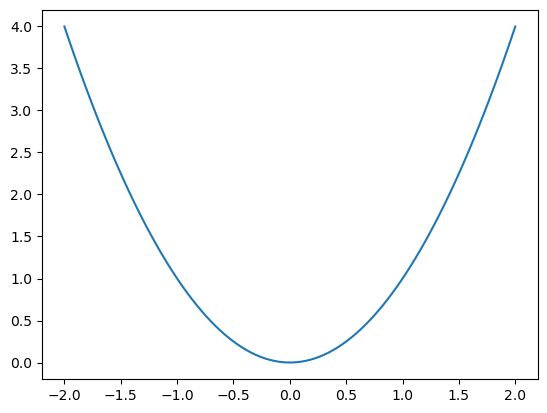

In [69]:
# Primeiramente importamos a Matplotlib, mais especificamente o seu módulo PyPlot:
import matplotlib.pyplot as plt
# Utilizaremos também a biblioteca NumPy, para gerar as amostras:
import numpy as np      

# Definindo f:
f = lambda x: x**2

# Tomamos uma amostra de 100 valores igualmente
# espaçados dentro do intervalo de -2 a 2:
xs = np.linspace(-2, 2, 100)

# Agora os valores correspondentes y = f(x) para x em xs
# podem ser calculados assim:
ys = f(xs)

# Então plotamos o gráfico obtido ligando-se pontos (x, y) vizinhos na tela:
plt.plot(xs, ys)
# E finalmente mostramos o resultado:
plt.show()

📝 Na célula acima, a instrução `xs = np.linspace(-2, 2, 100)` armazena na
variável `xs` um __array__ do NumPy, um tipo de dados parecido com uma lista,
mas mais poderoso e eficiente. A instrução `ys = xs**2` seria inválida em Python
baunilha se `xs` fosse uma lista ou tupla, porque não faz sentido elevar uma
destas ao quadrado. Contudo este tipo de _operação vetorizada_ é não apenas
válido como recomendado quando trabalhamos com arrays. O que está acontecendo é
que cada elemento $ x $ de `xs` é elevado ao quadrado, e o resultado é
armazenado no novo array `ys`. Operações vetorizadas utilizam o
_processamento em paralelo_ para obter uma eficiência maior; o resultado pode
ser uma melhoria de $ 2 $ ou até $ 3 $ ordens de magnitude na rapidez de
execução.

__Exemplo 2:__ Vejamos agora como modificar algumas configurações básicas
padrões de gráficos, por exemplo de modo a exibir um título, rótulos para os
eixos e uma grade retangular para auxílio da visualização.  Vamos fazê-lo
desenhando o gráfico de $ g(x) = \sin x $ no intervalo $ [0, 2\pi ] $.

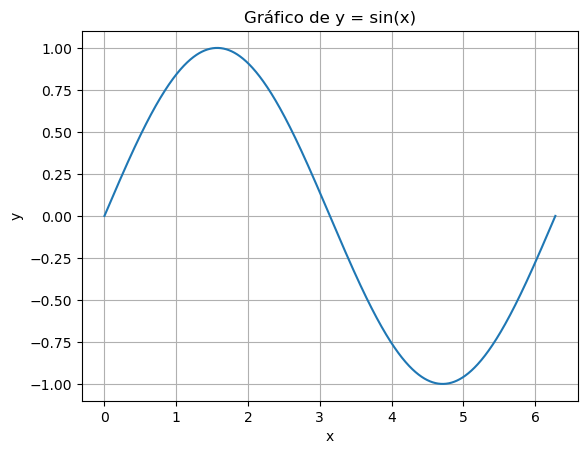

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Gerando os dados; desta vez vamos tomar uma amostra consistindo
# de 1_000 pontos para obter uma curva mais suave:
xs = np.linspace(0, 2 * np.pi, 1_000)
# Precisamos importar a função seno (sin), por exemplo do NumPy:
ys = np.sin(xs)

# Plotando o gráfico na tela:
plt.plot(xs, ys)

# Ajustando algumas configurações:
plt.title('Gráfico de y = sin(x)')  # Título do gráfico
plt.xlabel('x')     # Rótulo para o eixo-x
plt.ylabel('y')     # Rótulo para o eixo-y
plt.grid(True)      # Mostra um grid (grade retangular)

# Exibindo o resultado:
plt.show()

📝 Para salvar o gráfico que você gerou num arquivo externo (de nome
"grafico.png", digamos) , utilize a instrução `plt.savefig('grafico.png')`.
Ela deve vir depois do gráfico ter sido gerado e de todas as suas
configurações terem sido escolhidas, mas antes do comando `plt.show()`.

__Exemplo 3:__ Freqüentemente gostaríamos de plotar os gráficos de múltiplas
funções numa mesma tela, por exemplo para compará-los. Isto pode ser realizado
facilmente usando essencialmente a mesma sintaxe que acima. A diferença
principal é que precisamos usar um comando `plot` para cada gráfico.  Vamos
aproveitar a oportunidade para mostrar como fazer mais algumas customizações,
como alterar o estilo e a cor do traço utilizado no desenho.  Considere as
funções
$$
f(x) = \cos x  \qquad \text{e} \qquad g(x) = \cos x + \sin(\cos(x^3)) \qquad \big(x \in [-2\pi, 2\pi]\big)\,.
$$

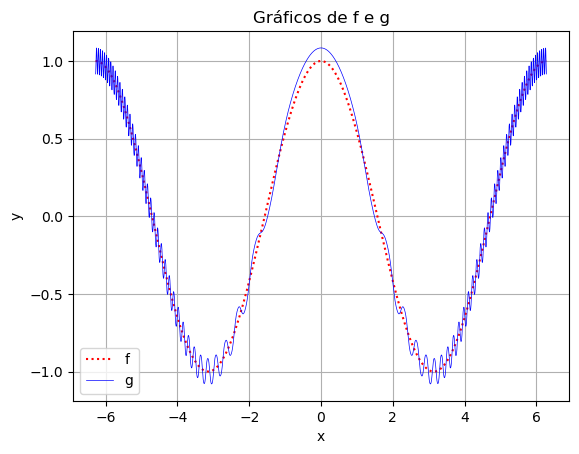

In [78]:
f = lambda x: np.cos(x)
g = lambda x: np.cos(x) + np.sin(np.cos(x**3)) / 10

xs = np.linspace(-2 * np.pi, 2 * np.pi, 10_000)
ys_f = f(xs)
ys_g = g(xs)

# Para o gráfico de f, vamos usar:
#   * Etiqueta 'f' na legenda
#   * Cor vermelha
#   * Traço pontilhado
plt.plot(xs, ys_f, label='f', color='red', linestyle='dotted')

# E para o gráfico de g:
#   * Etiqueta g na legenda
#   * Cor azul ('b' é abreviação de 'blue')
#   * Estilho de linha sólido ('solid', ou a versão abreviada '-')
#   * Espessura do traço 0.5 (pts, ou 1/72 avos de polegada)
plt.plot(xs, ys_g, label='g', color='b', linestyle='-', linewidth=0.5)

# Definindo título, rótulos para os eixos, e incluindo uma legenda e um grid:
plt.title('Gráficos de f e g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Salvando a figura em um arquivo antes de mostrá-la:
plt.savefig('grafico.png')
plt.show()

__Exercício (desenhando e customizando gráficos de funções de uma variável):__ Use
a Matplotlib para visualizar os gráficos descritos nos itens (a), (b) e (c):

(a) A função $f(x) = x^3 - 3x^2 - 9x + 6$ no intervalo $[-4, 6]$, com:
* o estilo da linha definido como pontilhado (`dotted`) na cor vermelho (`red`);
* etiquetando o eixo-$ x $ por '$ x $' e o eixo-$ y $ por '$ y $';
* exibindo o grid retangular;
* definindo o título do gráfico como "Função cúbica: $ f(x) = x^3 - 3x^2 - 9x + 6 $".

(b) A função $ g(x) = \sin(x)\exp(-0.1\, x) $ no intervalo $ [0, 100] $ com as
seguintes customizações:
* estilo do traço sólido (`solid`), na cor verde (`green` ou `g`) e espessura $ 0.5 $.
* rotulando o eixo-$ x $ como '$ x $' e o eixo-$ y $ como '$ y = f(x) $';
* exibindo uma grade retangular no fundo;
* definindo o título do gráfico como "Oscilação amortecida: $ g(x) = \sin(x)\exp(-0.1\,x) $".

(c) As funções 
$$
\varphi(x) = \ln x \quad \text{e} \quad \psi(x) = \ln x + \frac{\cos\big(10\,\vert x - 5 \vert\big)}{10}
$$
no intervalo $ x \in [0.1, 10] $ e para $ y $ em $ [-2, 2.5] $.  Para definir os
limites dos eixos $ x $ e $ y $ a serem exibidos, use `plt.xlim(0.1, 10)` e
analogamente para $ y $. (O logaritmo natural pode ser importado do NumPy como
`log`.) Utilize as seguintes opções:
* para o gráfico de $ \varphi $: estilo da linha tracejado (`dashed` ou `--`),
  na cor azul (`orange` ou `o`), e com rótulo "\$ \\phi \$";
* para o gráfico de $ \psi $: estilo da linha sólido (`solid`), cor roxo (`purple`), e rótulo "\$ \\psi \$";
* etiquetando os eixos;
* _não_ exibindo uma grade retangular no fundo;
* exibindo uma legenda para facilitar a distinção dos gráficos;
* definindo o título do gráfico como "Comparação gráficos envolvendo o logaritmo $ y = \ln x $". 

## $ \S 3 $ Gráficos de dispersão

Um __gráfico de dispersão__ (_scatter plot_) utiliza pontos para representar uma
amostra consistindo de pares $ (x_i, y_i) $ de valores de duas quantidades $ x $
e $ y $. Por exemplo, $ x $ poderia representar a altura e $ y $ o peso de uma
amostra da população brasileira; ou $ x $ poderia representar o tamanho
em $ \text{m}^2 $ e $ y $ o preço de uma coleção de imóveis comparáveis de
cinco capitais; ou ainda, $ x $ e $ y $ poderiam representar as pontuações em duas
áreas do conhecimento no ENEM para uma amostra de alunos de um determinado
estado. Em todos os casos, cada ponto no gráfico corresponde a uma observação no
conjunto de dados.

⚠️ Observe que não é necessário que haja uma relação de dependência entre $ x $
e $ y $, no sentido que $ y $ seja função de $ x $, ou vice-versa. Neste
contexto também é importante diferenciar claramente os conceitos de _população_
e _amostra_. __População__ refere-se ao conjunto completo de elementos de
interesse em um estudo, enquanto __amostra__ é um subconjunto da população,
selecionado para representar e inferir características da população como um
todo.

Gráficos de dispersão talvez sejam a ferramenta mais comum e importante para
visualização de dados. Eles são úteis para identificar padrões, correlações e
agrupamentos em conjuntos de dados envolvendo duas variáveis. Por sua forma
simples, eles facilitam a visualização clara dos dados e auxiliam a
interpretação. Em particular, freqüentemente eles constituem o primeiro passo
na análise exploratória de um conjunto de dados.

__Exemplo 1 (exemplo mínimo):__ Vamos mostrar introduzir a sintaxe mínima
necessária para criar um gráfico de dispersão com a Matplotlib. O NumPy
será utilizado para gerar pontos aleatórios (escolhidos de acordo com a
distribuição normal).

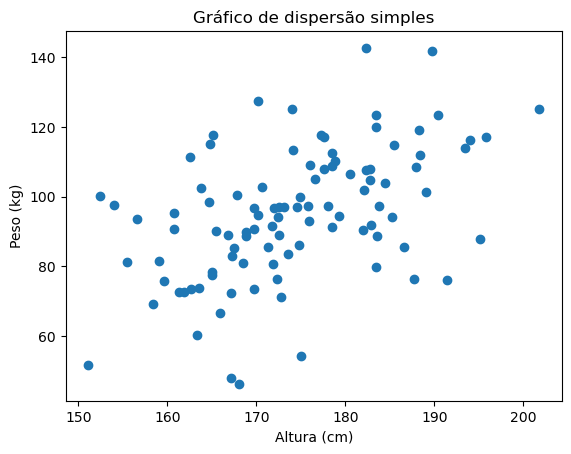

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Gerando dados simulados com o NumPy:
xs = np.random.normal(173, 10, 100)
ys = 0.89 * xs - 57.15 + np.random.normal(0, 15, 100)

# Plotando o gráfico de dispersão:
plt.scatter(xs, ys)
plt.title('Gráfico de dispersão simples')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

__Exemplo 2:__  Neste exemplo vamos ilustrar a plotagem de um gráfico de
dispersão com múltiplas séries de dados através de um conjunto de dados 
real. Vamos precisar da biblioteca _Pandas_, utilizada sobretudo na análise de
dados (especialmente séries temporais), mas que não vamos estudar aqui.

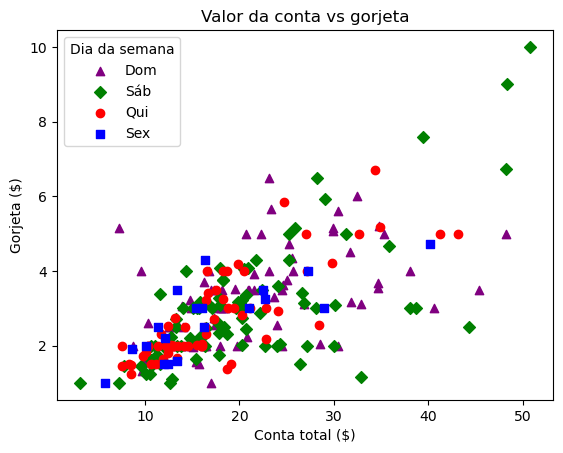

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregando o conjunto de dados "Tips":
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

# Tradução dos dias da semana para o português
day_translation = {'Thur': 'Qui', 'Fri': 'Sex', 'Sat': 'Sáb', 'Sun': 'Dom'}

# Mapeando cores e estilos para os dias da semana:
colors = {'Qui': 'red', 'Sex': 'blue', 'Sáb': 'green', 'Dom': 'purple'}
markers = {'Qui': 'o', 'Sex': 's', 'Sáb': 'D', 'Dom': '^'}

# Plotando o gráfico de dispersão com múltiplas séries:
for day in tips['day'].unique():
    translated_day = day_translation[day]
    subset = tips[tips['day'] == day]
    plt.scatter(subset['total_bill'], subset['tip'], label=translated_day,
                color=colors[translated_day], marker=markers[translated_day])

plt.title('Valor da conta vs gorjeta')
plt.xlabel('Conta total ($)')
plt.ylabel('Gorjeta ($)')
plt.legend(title='Dia da semana')
plt.show()

__Exercício:__ Os dados abaixo contêm as temperaturas de ebulição e
fusão de vários elementos químicos, juntamente com as da água
($ \mathrm{H_2O} $), incluída por referência.

In [1]:
# Importando o NumPy e o Pyplot:
import numpy as np
import matplotlib.pyplot as plt

# Fonte dos dados: https://pubchem.ncbi.nlm.nih.gov/
# Criando um array para armazenar os pontos de fusão (em Kelvin):
pontos_fusao = np.array([
    273.15,  # Água (H2O)
    54.36,   # Hélio (He)
    317.43,  # Argônio (Ar)
    1156,    # Sódio (Na)
    933.47,  # Alumínio (Al)
    1811,    # Cálcio (Ca)
    1357.77, # Cobre (Cu)
    172.17,  # Cloro (Cl)
])
# Criando outro array para armazenar os pontos de ebulição (em Kelvin):
pontos_ebulicao = np.array([
    373.15,  # Água (H2O)
    4.22,    # Hélio (He)
    87.3,    # Argônio (Ar)
    1156,    # Sódio (Na)
    2792,    # Alumínio (Al)
    2671,    # Cálcio (Ca)
    2835,    # Cobre (Cu)
    239.11,  # Cloro (Cl)
])
# Criando uma lista para nos ajudar a identificar qual ponto corresponde a qual elemento:
nomes_elementos = [
    "Água (H2O)",
    "Hélio (He)",
    "Argônio (Ar)",
    "Sódio (Na)",
    "Alumínio (Al)",
    "Cálcio (Ca)",
    "Cobre (Cu)",
    "Cloro (Cl)",
]

_(continuação do enunciado)_ Complete o esboço abaixo para produzir um gráfico
de dispersão em que cada ponto $ (x, y) $ corresponde ao ponto de fusão $ (x) $
e ponto de ebulição $ (y) $ de um determinado elemento.

In [ ]:
# Usando `scatter`, construa o gráfico consistindo dos pares (fusão, ebulição)
# para cada elemento:
plt...

# Anotando os pontos para nos ajudar a identificá-los:
for i, elemento in enumerate(nomes_elementos):
    plt.annotate(elemento, (pontos_fusao[i], pontos_ebulicao[i]), fontsize=9)

# Rotule os dois eixos:
plt... 
plt... 

# Crie um títule para o gráfico:
plt...

# Exiba um grid retangular ao fundo:
plt...

# Mostre o resultado:
plt...

## $ \S 4 $ Alguns princípios para o design bem-sucedido de gráficos

Para terminar, vamos listar alguns princípios para o design de gráficos
informativos, agradáveis e transparentes, adaptados do livro
[_The Visual Display of Quantitative Information_](https://www.edwardtufte.com/tufte/books_vdqi)
de Edward R. Tufte, um clássico e provavelmente a melhor referência sobre este
tópico. O livro contém várias outras formulações de melhores práticas, além
de exemplos/contra-exemplos de gráficos excelentes de vários tipos.

- **Clareza:** Comunique os dados com clareza e precisão.
- **Integridade:** Assegure que a representação gráfica não distorça os dados subjacentes.
- **Densidade:** Apresente uma grande quantidade de informações e idéias em um espaço pequeno.
- **Estrutura:** Preserve uma estrutura lógica na apresentação para guiar o observador.
- **Simplicidade:** Busque a simplicidade no design mantendo a riqueza dos dados.
- **Comparabilidade:** Facilite comparações de diferentes conjuntos de dados ou de um mesmo conjunto ao longo do tempo.
- **Importância dos detalhes:** Preste atenção aos pequenos detalhes, como rótulos, anotações e escalas.
- **Relevância:** Use gráficos que estejam diretamente relacionados ao conteúdo.
- **Maximize a tinta de dados:** Utilize tinta para exibir os dados, em vez de decoração não-essencial.
- **Mantenha um baixo fator de mentira:** Assegure que o gráfico represente os
dados com precisão. Mire num _fator de mentira_ próximo a $1$, onde
  $$
  \text{Fator de mentira} = \frac{\text{Tamanho do efeito mostrado no gráfico}}{\text{Tamanho do efeito nos dados}}
  $$
- **Apresente dados multivariados:** Tente mostrar múltiplas dimensões e fontes de evidência dentro do mesmo gráfico sempre que possível.
- **Conte uma história:** Use gráficos para transmitir uma narrativa ou um argumento coerente.
